In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [6]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/abalone.data",header=None)
df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
for i in range(7):
    df[i]=LabelEncoder().fit_transform(df[i])

df.columns =["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,0.1500,15
1,2,45,36,17,285,178,94,0.0700,7
2,0,81,67,26,962,480,280,0.2100,9
3,2,63,56,24,718,400,225,0.1550,10
4,1,41,34,15,253,159,76,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,0.2490,11
4173,2,93,71,26,1411,832,426,0.2605,10
4174,2,95,78,40,1727,994,571,0.3080,9
4175,0,100,80,29,1610,1005,518,0.2960,10


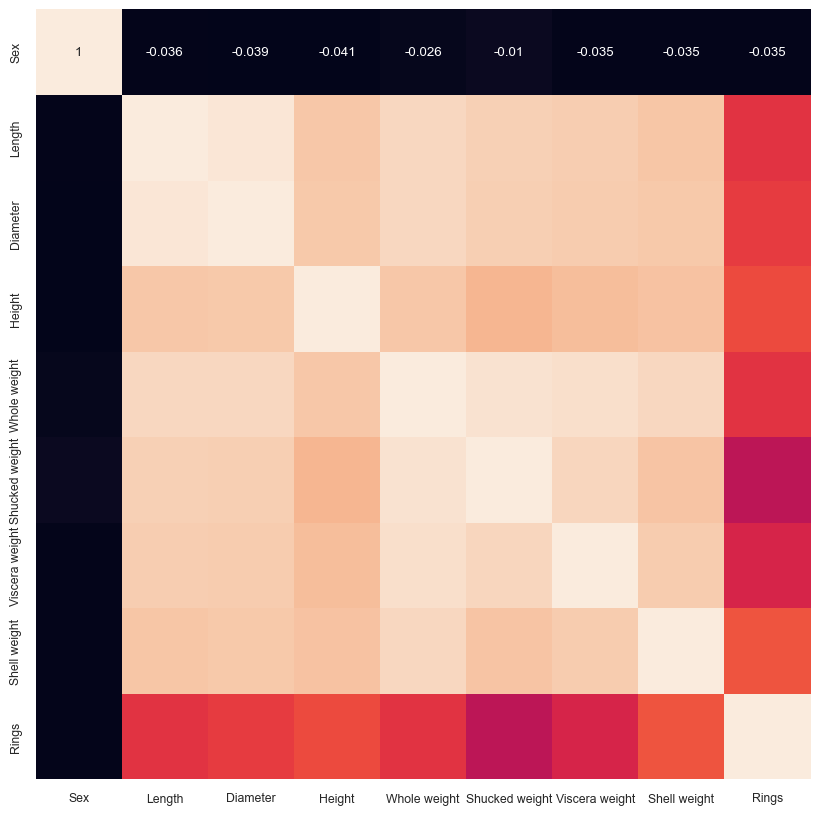

In [8]:
df_corr=df.corr()
#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [9]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [55]:
# 데이터 분류
X=df.drop('Rings',axis=1)
y=df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(X_train.shape)
print(y_train.shape)
print(y.value_counts())

(3132, 8)
(3132, 28)
Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64


In [64]:
from tensorflow.keras import Input, layers, Model 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Reshape, Conv2D

input_layer=Input(shape=(8,))
reshaped_input = Reshape((8, 1, 1))(input_layer)

layer1=layers.Conv2D(16, (1,1),activation="relu")(reshaped_input)

layer2=layers.Conv2D(32, (1,1),activation="relu")(layer1)

layer3=layers.Conv2D(48, (1,1),activation="relu")(layer2)

flatten=layers.Flatten()(layer3)
flatten_layer=layers.Dense(32,activation="relu")(flatten)
out_layer=layers.Dense(1)(flatten_layer)

model=Model(inputs=input_layer,outputs=out_layer)
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_17 (Reshape)            │ (None, 8, 1, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 8, 1, 16)       │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 8, 1, 32)       │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 8, 1, 48)       │         1,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │        12,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,513 (56.69 KB)

 Trainable params: 14,513 (56.69 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
n_epoch=10
n_size=32
history=model.fit(X_train,y_train, epochs=n_epoch, batch_size=32,validation_data= (X_test,y_test))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 443.8835 - mse: 443.8835 - val_loss: 1.2389 - val_mse: 1.2389
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.5368 - mse: 32.5368 - val_loss: 5.6779 - val_mse: 5.6779
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.7267 - mse: 11.7267 - val_loss: 0.4751 - val_mse: 0.4751
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0920 - mse: 3.0920 - val_loss: 2.4224 - val_mse: 2.4224
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2627 - mse: 1.2627 - val_loss: 0.1354 - val_mse: 0.1354
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2437 - mse: 0.2437 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1564 - mse: 0.1564 - val_loss: 0.1705 - val_mse: 0.1705
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0819 - mse: 0.0819 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1119

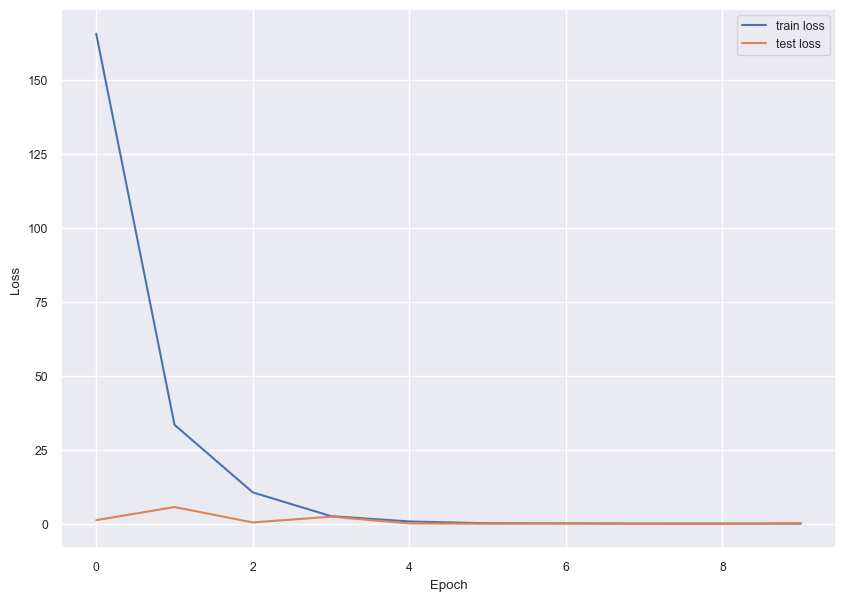

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2381 - mse: 0.2381 
test accuracy:  0.24626128375530243


In [66]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(n_epoch), history.history['loss'], label='train loss')
plt.plot(range(n_epoch), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test accuracy: ", test_acc)

In [70]:
# model save
base_loss,base_accuracy=model.evaluate(X_test, y_test)

model_file='C:/ai/dataset/abalone_Model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.2381 - mse: 0.2381


model saved at  C:/ai/dataset/abalone_Model.h5
Accuracy >24.626128
Base Loss >0.25


In [72]:
# model load
from tensorflow.keras.models import load_model

base_model = load_model(model_file)
base_model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

base_model.evaluate(X_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2381 - mse: 0.2381  


[0.24626128375530243, 0.24626128375530243]

In [73]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [78]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model

In [86]:
# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(1))  # 예: 10개의 클래스
new_model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

# 모델 요약 출력
new_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_17 (Reshape)            │ (None, 8, 1, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 8, 1, 16)       │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 8, 1, 32)       │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 8, 1, 48)       │         1,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │        12,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,185 (90.57 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 14,480 (56.56 KB)

In [87]:
history2=new_model.fit(X_train, y_train, epochs = 20, batch_size = 4, validation_split = 0.1, shuffle = True)

Epoch 1/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 2/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 3/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 4/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 5/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 6/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 8/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 9/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.0322 - mse: 0.0322


[0.03222707659006119, 0.03222707659006119]

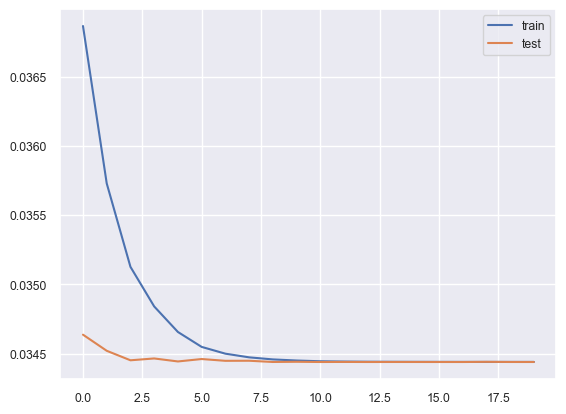

In [89]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

new_model.evaluate(X_test, y_test)